# Import Libraries

In [1]:
import pandas as pd
from datetime import timedelta

# Import Data

In [3]:
df = pd.read_excel('../data/Online Retail.xlsx')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Exploration

In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [28]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Explore each variable 

### InvoiceNo

* It appears that an Invoice with C is for refunds.
* When calculating the total spend by customers, these refunds should offset the original purchase, as quantity is negative for refunds.

In [50]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C574496       1
C559705       1
C562793       1
C539566       1
C578142       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [82]:
# Convert to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Look at a couple rows that begin with C
df[(df['InvoiceNo']=='C578142') | (df['InvoiceNo']=='C539566')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38415,C539566,79000,MOROCCAN TEA GLASS,-3,2010-12-20 11:56:00,0.65,16705.0,United Kingdom
492643,C578142,23569,TRADTIONAL ALPHABET STAMP SET,-2,2011-11-23 11:04:00,4.95,17010.0,United Kingdom


### StockCode

In [85]:
df['StockCode'].value_counts()

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
82545A         1
20678          1
35603B         1
DCGS0004       1
90060B         1
Name: StockCode, Length: 4070, dtype: int64

### Description

In [88]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
Given away                               1
PEARL & SHELL 42"NECKL. IVORY            1
Found by jackie                          1
WRAP BLUE RUSSIAN FOLKART                1
amazon adjust                            1
Name: Description, Length: 4223, dtype: int64

###  Quantity

In [117]:
df['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [122]:
quantity_min = df['Quantity'] == df['Quantity'].min()
df[quantity_min]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [121]:
quantity_max = df['Quantity'] == df['Quantity'].max()
df[quantity_max]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [114]:
customer_16446 = df['CustomerID'] == quantity_max_customer
df[customer_16446]

ValueError: Can only compare identically-labeled Series objects

In [110]:
df[customer_16446].groupby(['Quantity']).count()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country
Quantity,,,,,,,
1,32,32,32,32,32,32,32
2,28,28,28,28,28,28,28
3,20,20,20,20,20,20,20
4,13,13,13,13,13,13,13
5,5,5,5,5,5,5,5
6,20,20,20,20,20,20,20
7,2,2,2,2,2,2,2
8,3,3,3,3,3,3,3
9,4,4,4,4,4,4,4


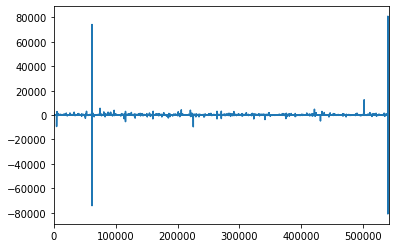

In [97]:
df['Quantity'].plot()

### InvoiceDate

### UnitPrice

In [ ]:
plt.plot(df.UnitPrice)

### CustomerID

* Na values in CustomerID could be simply "Guest" accounts

In [91]:
# How many na values?
df['CustomerID'].isna().sum()

135080

In [93]:
# Look at rows with na values in Customer ID
customerid_na = df['CustomerID'].isna()
df[customerid_na].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


### Country

In [15]:
# How many different countries are there?
num_of_countries = df['Country'].value_counts().count()
print('There are {} countries in the dataset'.format(num_of_countries))

There are 38 countries in the dataset
